In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score,precision_score,recall_score,f1_score
import seaborn as sns
import matplotlib.pyplot as plt


file_path = r"d:\4th semester\Programming for AI\GOOG.csv"
df = pd.read_csv(file_path)
print(df.head())
print(df.tail())

         Date      Open      High       Low     Close  Adj Close     Volume
0  2004-08-19  2.490664  2.591785  2.390042  2.499133   2.499133  897427216
1  2004-08-20  2.515820  2.716817  2.503118  2.697639   2.697639  458857488
2  2004-08-23  2.758411  2.826406  2.716070  2.724787   2.724787  366857939
3  2004-08-24  2.770615  2.779581  2.579581  2.611960   2.611960  306396159
4  2004-08-25  2.614201  2.689918  2.587302  2.640104   2.640104  184645512
            Date        Open        High         Low       Close   Adj Close  \
4853  2023-11-29  138.985001  139.669998  136.294998  136.399994  136.399994   
4854  2023-11-30  136.399994  136.960007  132.789993  133.919998  133.919998   
4855  2023-12-01  133.320007  133.500000  132.151993  133.320007  133.320007   
4856  2023-12-04  131.294006  131.449997  129.399994  130.630005  130.630005   
4857  2023-12-05  130.369995  133.539993  129.729996  132.389999  132.389999   

        Volume  
4853  21014700  
4854  29913500  
4855  242584

In [18]:
print("Check for any missing values...")
print(df.isnull().sum())

print("droping the missing values...")
missing_values = df.dropna(inplace=True)
print(missing_values)




Check for any missing values...
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
droping the missing values...
None


In [19]:


features=['Open','High','Low','Volume','Adj Close']
target =['Close']


X = df[features]
y = df[target]

print(X)
print(y)
print(X.shape)
print(y.shape)


            Open        High         Low     Volume   Adj Close
0       2.490664    2.591785    2.390042  897427216    2.499133
1       2.515820    2.716817    2.503118  458857488    2.697639
2       2.758411    2.826406    2.716070  366857939    2.724787
3       2.770615    2.779581    2.579581  306396159    2.611960
4       2.614201    2.689918    2.587302  184645512    2.640104
...          ...         ...         ...        ...         ...
4853  138.985001  139.669998  136.294998   21014700  136.399994
4854  136.399994  136.960007  132.789993   29913500  133.919998
4855  133.320007  133.500000  132.151993   24258400  133.320007
4856  131.294006  131.449997  129.399994   24117100  130.630005
4857  130.369995  133.539993  129.729996   19216500  132.389999

[4858 rows x 5 columns]
           Close
0       2.499133
1       2.697639
2       2.724787
3       2.611960
4       2.640104
...          ...
4853  136.399994
4854  133.919998
4855  133.320007
4856  130.630005
4857  132.389999

[4

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)


[[-1.01036075 -1.00762365 -1.01247382  5.14797627 -1.00987046]
 [-1.00970882 -1.00441998 -1.00951287  2.24789694 -1.00472969]
 [-1.00342191 -1.001612   -1.00393662  1.63954216 -1.00402664]
 ...
 [ 2.3801667   2.3466114   2.38540679 -0.62592619  2.37803101]
 [ 2.32766157  2.29408458  2.31334434 -0.62686055  2.30836734]
 [ 2.30371522  2.34763613  2.3219856  -0.65926618  2.35394636]]


In [22]:
import torch
# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)  # Column vector
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)  # Column vector

print("X train tensor :",X_train_tensor)
print("X test tensor  : ",X_test_tensor)
print("Y train tensor :",y_train_tensor)
print("y test tensor  :" ,y_test_tensor)

X train tensor : tensor([[-0.7275, -0.7285, -0.7260, -0.2405, -0.7293],
        [-0.8199, -0.8206, -0.8207,  0.5726, -0.8200],
        [-0.0642, -0.0712, -0.0588, -0.6681, -0.0641],
        ...,
        [-0.0752, -0.0767, -0.0692, -0.5725, -0.0765],
        [ 0.4493,  0.4407,  0.4444, -0.5776,  0.4330],
        [-0.6822, -0.6848, -0.6848,  1.4809, -0.6874]])
X test tensor  :  tensor([[-6.7639e-01, -6.7564e-01, -6.7260e-01, -1.5828e-01, -6.7199e-01],
        [ 2.1980e+00,  2.1642e+00,  2.1429e+00, -6.0627e-01,  2.1532e+00],
        [ 1.9311e+00,  1.9076e+00,  1.9014e+00, -6.2068e-01,  1.8923e+00],
        ...,
        [ 7.4706e-04, -7.5346e-03,  2.3177e-03, -5.9156e-01,  1.8671e-03],
        [-8.4322e-01, -8.4110e-01, -8.4483e-01,  6.0263e-01, -8.4365e-01],
        [-9.2748e-01, -9.2773e-01, -9.2736e-01,  1.0094e+00, -9.2752e-01]])
Y train tensor : tensor([[13.3325],
        [ 9.8326],
        [39.0175],
        ...,
        [38.5420],
        [58.2145],
        [14.9502]])
y test tenso

In [23]:
import torch
import torch.nn as nn

class Google_stockprice(nn.Module):
    def __init__(self):
        super(Google_stockprice, self).__init__()
        
      
        self.w1 = torch.randn(5, 64, requires_grad=True)         # 5 input features -> 64 neurons in the 1st layer
        self.b1 = torch.randn(64, requires_grad=True)            # b1
        
        self.w2 = torch.randn(64, 32, requires_grad=True)        #  32 neurons in the 2nd layer
        self.b2 = torch.randn(32, requires_grad=True)            # b2
        
        self.w3 = torch.randn(32, 1, requires_grad=True)         #  1 output (Close price)
        self.b3 = torch.randn(1, requires_grad=True)             # b3
        
        
        # forward pass

    def forward(self, x):
        
        x = torch.mm(x, self.w1) + self.b1                        # w1x+b1
        x = torch.relu(x)                                         # ReLU fun for the first hidden layer
        
        x = torch.mm(x, self.w2) + self.b2                        # w2x+b2
        x = torch.relu(x)                                         # ReLU fun for the  hidden layer
        
        x = torch.mm(x, self.w3) + self.b3                         #  w3x+b3
        return x                                                   # linear output 
            

# Instantiate the model
model = Google_stockprice()



In [33]:
import torch.optim as optim
from sklearn.metrics import mean_squared_error, r2_score
import torch.nn as nn
import torch.optim as optim



loss_fun = nn.MSELoss()    # Mean Squared Error for regression
optimizer = optim.Adam([model.w1, model.b1, model.w2, model.b2, model.w3, model.b3], lr=0.001)


# Train the model
num_epochs = 64
for epoch in range(num_epochs):
    model.train()  

    
    optimizer.zero_grad()

     # Forward pass
    outputs = model(X_train_tensor)
    loss = loss_fun(outputs, y_train_tensor)

    # Backward pass ---> to compute gradients
    loss.backward()

   
    optimizer.step()

    # loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')






Epoch [10/64], Loss: 168.4710
Epoch [20/64], Loss: 120.8234
Epoch [30/64], Loss: 93.6503
Epoch [40/64], Loss: 65.0107
Epoch [50/64], Loss: 45.5983
Epoch [60/64], Loss: 30.3615


In [34]:
# Evaluation mode
model.eval()

# Predict the stock prices for the test set
with torch.no_grad():
    predicted = model(X_test_tensor)

                                  
predicted_prices = predicted.numpy()          
y_test_numpy = y_test_tensor.numpy()

# Calculate the metrics
mse = mean_squared_error(y_test_numpy, predicted_prices)
r2 = r2_score(y_test_numpy, predicted_prices)

print(f'\nMean Squared Error: {mse}')
print(f'R-squared (R2): {r2}')



Mean Squared Error: 24.121458053588867
R-squared (R2): 0.9846026301383972


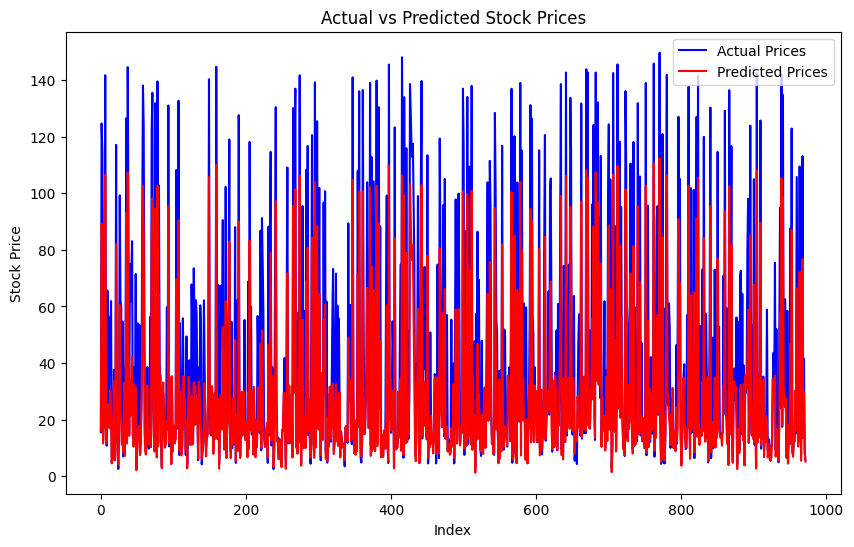

In [28]:
# Plot the predicted vs actual values
plt.figure(figsize=(10,6))
plt.plot(y_test_numpy, label='Actual Prices', color='blue')
plt.plot(predicted_prices, label='Predicted Prices', color='red')
plt.xlabel('Index')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()

In [ ]:

import torch.optim as optim
from sklearn.metrics import mean_absolute_error, r2_score  


loss_fun = nn.L1Loss()  # Mean Absolute Error (L1 Loss) for regression
optimizer = optim.Adam([model.w1, model.b1, model.w2, model.b2, model.w3, model.b3], lr=0.001)

#  store loss values 
train_losses = []
val_losses = []
test_losses = []

# Train the model
num_epochs = 11
for epoch in range(num_epochs):
    model.train()  

  
    optimizer.zero_grad()

    
    outputs = model(X_train_tensor)
    train_loss = loss_fun(outputs, y_train_tensor)

    # Backward
    train_loss.backward()

   
    optimizer.step()

    
    train_losses.append(train_loss.item())

    # Calculate validation loss
    model.eval()  
    with torch.no_grad():                    # why not to compute gradient for validation loss??????
        val_outputs = model(X_test_tensor)
        val_loss = loss_fun(val_outputs, y_test_tensor)
        val_losses.append(val_loss.item())

    
    test_losses.append(val_loss.item())  

    #  epoch losses
    print(f"Epoch [{epoch + 1}/{num_epochs}]")
    print(f"Train Loss:      {train_loss.item():.4f}")
    print(f"Validation Loss: {val_loss.item():.4f}")
    print("\n" + "-"*15 + "\n") 





Epoch [1/11]
Train Loss:      3.0516
Validation Loss: 3.0441

---------------

Epoch [2/11]
Train Loss:      3.0182
Validation Loss: 3.0725

---------------

Epoch [3/11]
Train Loss:      3.0621
Validation Loss: 2.8976

---------------

Epoch [4/11]
Train Loss:      2.8868
Validation Loss: 2.7668

---------------

Epoch [5/11]
Train Loss:      2.7449
Validation Loss: 2.7948

---------------

Epoch [6/11]
Train Loss:      2.7630
Validation Loss: 2.6675

---------------

Epoch [7/11]
Train Loss:      2.6444
Validation Loss: 2.5191

---------------

Epoch [8/11]
Train Loss:      2.5111
Validation Loss: 2.4956

---------------

Epoch [9/11]
Train Loss:      2.4976
Validation Loss: 2.4260

---------------

Epoch [10/11]
Train Loss:      2.4322
Validation Loss: 2.2988

---------------

Epoch [11/11]
Train Loss:      2.3051
Validation Loss: 2.2484

---------------



In [36]:
 # evaluation mode after training
model.eval()


with torch.no_grad():
    predicted = model(X_test_tensor)


predicted_prices = predicted.numpy()
y_test_numpy = y_test_tensor.numpy()

# Calculate the metrics
mae = mean_absolute_error(y_test_numpy, predicted_prices)  # Use MAE from sklearn
r2 = r2_score(y_test_numpy, predicted_prices)

print(f'\nMean Absolute Error: {mae}')
print(f'R-squared: {r2}')




Mean Absolute Error: 2.2483856678009033
R-squared: 0.9922440052032471


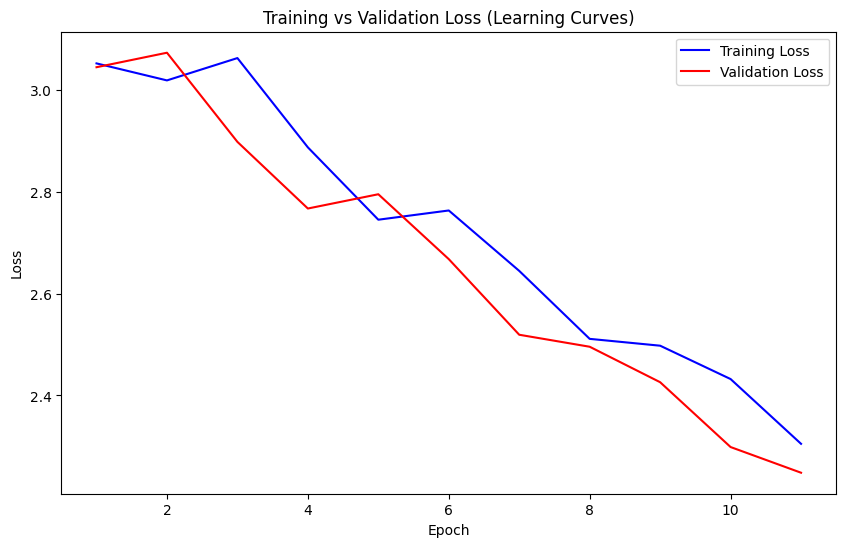

In [37]:
# Plot the learning curves (Training vs Validation Loss)
plt.figure(figsize=(10,6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss (Learning Curves)')
plt.legend()
plt.show()

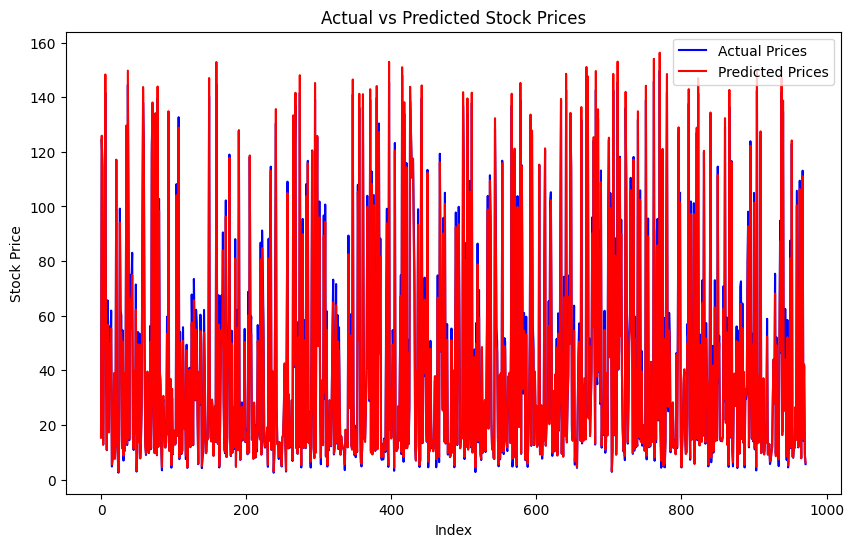

In [38]:
#  predicted vs actual values
plt.figure(figsize=(10,6))
plt.plot(y_test_numpy, label='Actual Prices', color='blue')
plt.plot(predicted_prices, label='Predicted Prices', color='red')
plt.xlabel('Index')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()
